# Data Preparation and Exploration

## Introduction

이 노트북은 NS 홈쇼핑 대회의 데이터에 대한 의미있는 인사이트를 얻는 것에 목적을 둔다.

## Loading packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## Loading data

In [3]:
sales_result_ds = pd.read_excel('./data/sales_result.xlsx')
rating_ds = pd.read_excel('./data/rating.xlsx')

In [4]:
# sales_result_ds column 수정
header = sales_result_ds.iloc[0]
sales_result_ds = sales_result_ds[1:] 
sales_result_ds.rename(columns = header, inplace=True)

# rating_ds column 수정
header = rating_ds.iloc[0]
rating_ds = rating_ds[1:] 
rating_ds.rename(columns = header, inplace=True)

## Data at first sight

In [5]:
sales_result_ds.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
1,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000
2,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000
3,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000
4,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000
5,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000


In [6]:
rating_ds.head()

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
1,02:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.003
2,02:01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.012,0.003
3,02:02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.004
4,02:03,0,0,0.014,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.004
5,02:04,0,0,0,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.004


In [7]:
sales_result_ds.shape

(38309, 8)

In [8]:
rating_ds.shape

(1441, 367)

### Simple stats of the Dataset

In [9]:
unique_products = len(sales_result_ds['상품코드'].unique())
unique_products_mother = len(sales_result_ds['마더코드'].unique())

print("total product = ", unique_products)
print("total mother code = ", unique_products_mother)

total product =  2124
total mother code =  716


### Null 값 확인

In [10]:
sales_result_ds.isnull().sum()

방송일시         0
노출(분)    16784
마더코드         0
상품코드         0
상품명          0
상품군          0
판매단가         0
취급액       2930
dtype: int64

- Null 값은 "노출(분)"과 "취급액" column에만 존재. __"노출(분)"의 Null 값은 방송되고 있는 상품의 다른 옵션이라고 생각된다. (예를 들어, 남성/여성, 일시불/무이자...)__

In [11]:
sales_result_ds.loc[sales_result_ds.취급액.isnull()]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
145,2019-01-02 22:00:00,NaN,100148,200432,무이자 LG 울트라HD TV 55UK6800HNC,가전,1440000,NaN
148,2019-01-02 22:00:00,NaN,100148,200518,일시불 LG 울트라HD TV 70UK7400KNA,가전,2700000,NaN
149,2019-01-02 22:00:00,NaN,100148,200451,무이자 LG 울트라HD TV 70UK7400KNA,가전,2990000,NaN
154,2019-01-02 22:20:00,NaN,100148,200518,일시불 LG 울트라HD TV 70UK7400KNA,가전,2700000,NaN
155,2019-01-02 22:20:00,NaN,100148,200451,무이자 LG 울트라HD TV 70UK7400KNA,가전,2990000,NaN
...,...,...,...,...,...,...,...,...
38305,2020-01-01 00:20:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38306,2020-01-01 00:40:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38307,2020-01-01 01:00:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38308,2020-01-01 01:20:00,20,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN


- 취급액의 Null 값은 추후 분석이 필요할 것 같다.

In [12]:
# 일단 편의를 위해 Null 값을 0으로 채우자
sales_result_ds = sales_result_ds.fillna(0)

In [13]:
rating_ds.isnull().sum()

시간대                         0
2019-01-01                  0
2019-01-02                  0
2019-01-03                  0
2019-01-04                  0
                           ..
2019-12-28                  0
2019-12-29                  0
2019-12-30                  0
2019-12-31                  0
2019-01-01 to 2019-12-31    0
Length: 367, dtype: int64

- rating_ds에는 null 값이 존재하지 않는다.

### 데이터 타입 변환하기

In [14]:
sales_result_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 1 to 38309
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    38309 non-null  datetime64[ns]
 1   노출(분)   38309 non-null  float64       
 2   마더코드    38309 non-null  int64         
 3   상품코드    38309 non-null  int64         
 4   상품명     38309 non-null  object        
 5   상품군     38309 non-null  object        
 6   판매단가    38309 non-null  int64         
 7   취급액     38309 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 2.3+ MB


- sales_result_ds에 있는 데이터의 타입이 모두 'object' 이다. 앞으로의 데이터 관리를 용이하게 하기 위해 데이터 타입을 변경하고자 한다.

In [15]:
sales_result_ds = sales_result_ds.astype({'노출(분)':int, '마더코드':int, '상품코드':int, '판매단가':int, '취급액':int})

In [16]:
sales_result_ds['방송일시'] = pd.to_datetime(sales_result_ds['방송일시'], format='%Y-%m-%d %H:%M:%S', errors='raise') # 방송일시 datetime으로 변환

## Metadata

- 데이터 관리를 위해, DataFrame에 meta 정보를 저장한다.
    - role: input, ID, target
    - level: nominal, continous, discrete, date
    - keep: True or False
    - dtype: int, float, str, datetime

In [17]:
data = []
for f in sales_result_ds.columns:
    # role 정의
    if f == '취급액':
        role = 'target'
    elif f == '상품코드':
        role = 'id'
    else:
        role = 'input'
         
    # level 정의
    if f == '방송일시':
        level = 'date'
    elif f == '노출(분)':
        level = 'discrete'
    elif f == '마더코드' or f == '상품코드' or f == '상품명' or f == '상품군':
        level = 'nominal'
    else:
        level = 'continous'
        
    # 상품코드(id)를 제외한 나머지 변수들의 keep를 True로 초기화
    keep = True
    if f == '상품코드':
        keep = False
    
    # data type 정의 
    dtype = sales_result_ds[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [18]:
meta

,role,level,keep,dtype
varname,,,,
방송일시,input,date,True,datetime64[ns]
노출(분),input,discrete,True,int64
마더코드,input,nominal,True,int64
상품코드,id,nominal,False,int64
상품명,input,nominal,True,object
상품군,input,nominal,True,object
판매단가,input,continous,True,int64
취급액,target,continous,True,int64


## Analyzing The Features

### 취급액 분석

- 취급액이 0(Null 값)인 경우는 무엇일까?

In [19]:
is_0 = sales_result_ds['취급액'] == 0
sales_result_ds[is_0]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
145,2019-01-02 22:00:00,0,100148,200432,무이자 LG 울트라HD TV 55UK6800HNC,가전,1440000,0
148,2019-01-02 22:00:00,0,100148,200518,일시불 LG 울트라HD TV 70UK7400KNA,가전,2700000,0
149,2019-01-02 22:00:00,0,100148,200451,무이자 LG 울트라HD TV 70UK7400KNA,가전,2990000,0
154,2019-01-02 22:20:00,0,100148,200518,일시불 LG 울트라HD TV 70UK7400KNA,가전,2700000,0
155,2019-01-02 22:20:00,0,100148,200451,무이자 LG 울트라HD TV 70UK7400KNA,가전,2990000,0
...,...,...,...,...,...,...,...,...
38305,2020-01-01 00:20:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,0
38306,2020-01-01 00:40:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,0
38307,2020-01-01 01:00:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,0
38308,2020-01-01 01:20:00,20,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,0


In [20]:
len(sales_result_ds[is_0 & (sales_result_ds['판매단가'] != 0)]) + len(sales_result_ds[sales_result_ds['상품군'] == '무형'])

2930

- 취급액이 0인 경우는, 두 가지 경우로 나뉘어진다.
    - 상품이 팔리지 않은 경우: 판매단가는 0이 아닌데, 취급액은 0
    - __상품군이 '무형'인 경우: 상품군이 무형일 경우 취급액은 0__

- __그렇다면 상품군이 "무형"일 경우에는 판매 수량을 알 수 없는 것일까?__

### 노출(분) 분석

In [21]:
sales_result_ds['노출(분)'].value_counts()

20    19061
0     16784
30     1163
10      763
15      189
16      122
17       61
60       48
13       48
14       12
25        6
26        6
12        6
3         5
23        5
5         5
6         5
11        3
22        3
18        3
19        2
2         2
9         1
40        1
8         1
7         1
29        1
24        1
27        1
Name: 노출(분), dtype: int64

- 노출(분)이 0분인 경우를 처리해야할 것 같다. (이전 Null 값)
- 노출(분)이 0분인 경우는 노출되고 있는 상품의 다른 옵션이다.
- __0분인 '노출(분)'의 값들을 동일한 상품의 시간으로 변경을 해보자.__

In [22]:
%%time
# 0분인 '노출(분)'의 값들을 동일한 상품의 시간으로 변경
for i in range(0,len(sales_result_ds)):
    if sales_result_ds.iloc[i]['노출(분)'] == 0:
        if sales_result_ds.iloc[i-1]['노출(분)'] != 0:
            sales_result_ds.iloc[i] = sales_result_ds.iloc[i].replace(sales_result_ds.iloc[i]['노출(분)'],sales_result_ds.iloc[i-1]['노출(분)'])

CPU times: user 56.9 s, sys: 420 ms, total: 57.3 s
Wall time: 57.6 s


In [23]:
sales_result_ds['노출(분)'].value_counts()

20    33860
30     2703
10      813
15      449
16      189
17       84
13       65
60       48
14       18
25       17
12       10
23        9
26        7
6         5
5         5
3         5
22        4
18        3
11        3
19        2
40        2
2         2
29        1
27        1
24        1
9         1
8         1
7         1
Name: 노출(분), dtype: int64

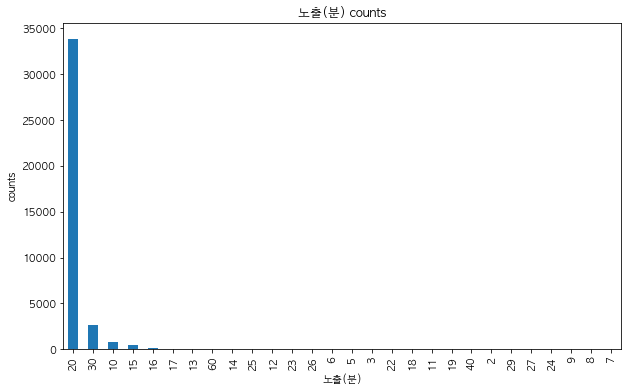

In [24]:
sales_result_ds['노출(분)'].value_counts().plot(kind = 'bar', figsize = (10,6), title = '노출(분) counts')
plt.xlabel('노출(분)')
plt.ylabel('counts')
plt.show()

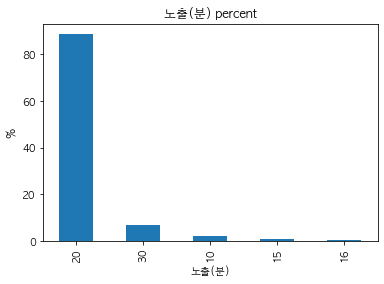

In [25]:
(sales_result_ds['노출(분)'].value_counts() / sales_result_ds['노출(분)'].count() * 100)[:5].plot(kind = 'bar', title = '노출(분) percent')
plt.xlabel('노출(분)')
plt.ylabel('%')
plt.show()

In [26]:
print("가장 긴 노출(분): ", sales_result_ds['노출(분)'].max())
print("가장 짧은 노출(분): ", sales_result_ds['노출(분)'].min())

가장 긴 노출(분):  60
가장 짧은 노출(분):  2


- 20분 편성이 가장 많고(88.3%), 30분(7%), 10분(2.1%) 순으로 많다.
- 가장 긴 노출 시간은 60분이다.
- 가장 짧은 노출 시간은 2분이다.

- 노출 시간에 따른 취급액을 알아보자.

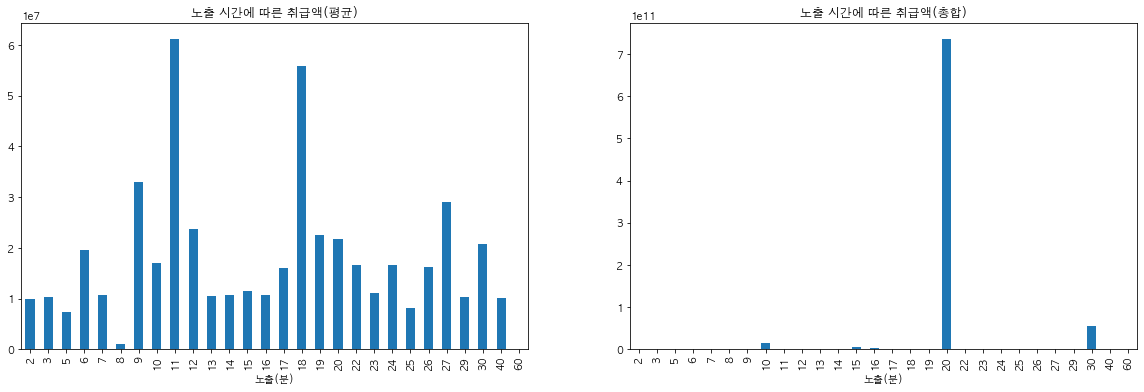

In [27]:
f, ax = plt.subplots(1,2,figsize=(20,6))
sales_result_ds.groupby(['노출(분)'])['취급액'].mean().plot(kind = 'bar', title = '노출 시간에 따른 취급액(평균)', ax = ax[0])
sales_result_ds.groupby(['노출(분)'])['취급액'].sum().plot(kind = 'bar', title = '노출 시간에 따른 취급액(총합)', ax = ax[1])
plt.show()

- 노출 시간과 취급액의 유의미한 상관관계는 없는 것 같다. __노출 시간과 판매개수 사이에는 유의미한 상관관계가 있지 않을까?__
- 노출 시간에 대한 데이터가 충분치 않아서 분석하기 힘들다.

In [28]:
# 새로운 '판매개수' column 생성
sales_result_ds['판매개수'] = sales_result_ds['취급액'] / sales_result_ds['판매단가']
sales_result_ds['판매개수'] = sales_result_ds['판매개수'].fillna(0)
sales_result_ds['판매개수'] = sales_result_ds['판매개수'].astype(int)

In [29]:
# '판매개수' metadata에 등록
meta.loc['판매개수'] = ['input', 'discrete', 'True', sales_result_ds['판매개수'].dtype]

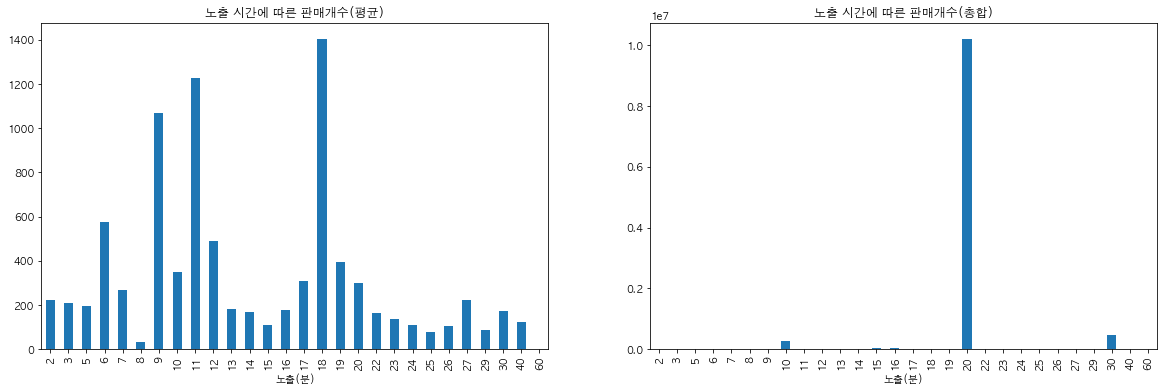

In [30]:
f, ax = plt.subplots(1,2,figsize=(20,6))
sales_result_ds.groupby(['노출(분)'])['판매개수'].mean().plot(kind = 'bar', title = '노출 시간에 따른 판매개수(평균)', ax = ax[0])
sales_result_ds.groupby(['노출(분)'])['판매개수'].sum().plot(kind = 'bar', title = '노출 시간에 따른 판매개수(총합)', ax = ax[1])
plt.show()

- 노출 시간과 판매개수 사이에도 별로 유의미한 상관관계는 없는 것 같다.
- 노출 시간이 길어진다고 해서 꼭 상품이 많이 팔리는 건 아니다. (다양한 노출 시간에 대한 데이터가 부족하다...)
- __판매량은 노출 시간보다는 다른 요인(상품이 무엇인지...)의 영향을 많이 받는 것 같다.__

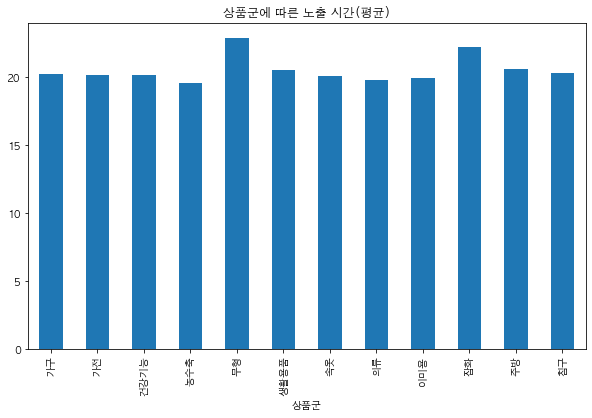

In [31]:
sales_result_ds.groupby(['상품군'])['노출(분)'].mean().plot(kind = 'bar', title = '상품군에 따른 노출 시간(평균)', figsize=(10,6))
plt.show()

- 상품군과 노출 시간 사이에도 별로 유의미한 관계는 찾지 못했다.

- __거의 대부분 20분 편성이고, 20분 이외의 다른 노출(분)에 대한 데이터가 부족하여 노출 시간에 따른 다른 변수의 상관관계를 찾기가 어렵다.__

### 방송일시 분석

### Weekly-Hour Analysis
- 상품 구매가 요일별/시간별 특징이 있을 것으로 보고 분석해보고자 한다.
- Week Hour 중심으로 데이터를 탐색해보자.

- 방송일시를 이용하여 월, 일, 요일별 column 생성하기

In [32]:
# 방송_월, 방송_일, 방송_시간, 방송_요일 column 생성 및 metadata 등록
sales_result_ds['방송_월'] = sales_result_ds['방송일시'].dt.month
sales_result_ds['방송_일'] = sales_result_ds['방송일시'].dt.day
sales_result_ds['방송_시간'] = sales_result_ds['방송일시'].dt.hour
sales_result_ds['방송_요일'] = sales_result_ds['방송일시'].dt.day_name()
meta.loc['방송_월'] = ['input', 'date', 'True', sales_result_ds['방송_월'].dtype]
meta.loc['방송_일'] = ['input', 'date', 'True', sales_result_ds['방송_일'].dtype]
meta.loc['방송_시간'] = ['input', 'date', 'True', sales_result_ds['방송_시간'].dtype]
meta.loc['방송_요일'] = ['input', 'date', 'True', sales_result_ds['방송_요일'].dtype]

- 상품 판매가 요일별/시간별 어떠한 특징이 있을까?

In [33]:
def drawWeekHour(ds, values, aggfunc = len, title = None, figsize = (20,7), cmap = 'summer_r'):
    weekhour_ds = sales_result_ds.pivot_table(index = '방송_요일', columns = '방송_시간', values = values, aggfunc = aggfunc).fillna(0)
    sns.set(style = "whitegrid", palette = "colorblind", font_scale = 1, rc = {'font.family':'AppleGothic'})
    plt.figure(figsize = figsize)
    f = sns.heatmap(weekhour_ds, annot = True, fmt = "1.1f", linewidths = .5, cmap = cmap)
    plt.xlabel("Hour")
    plt.ylabel("Day of Week")
    if title:
        plt.title(title, fontsize = 15)

### Weekly-hour headmap

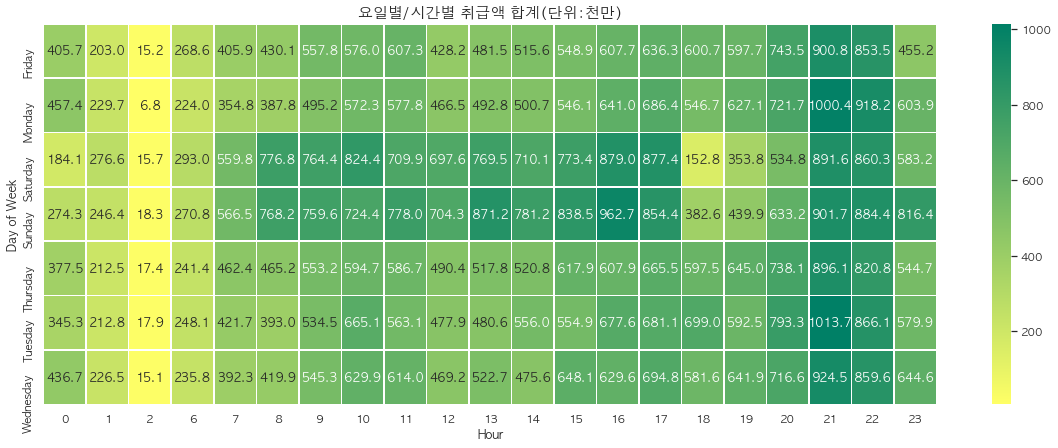

In [34]:
drawWeekHour(sales_result_ds, values = '취급액', title = '요일별/시간별 취급액 합계(단위:천만)', aggfunc = lambda x: sum(x)/10000000)

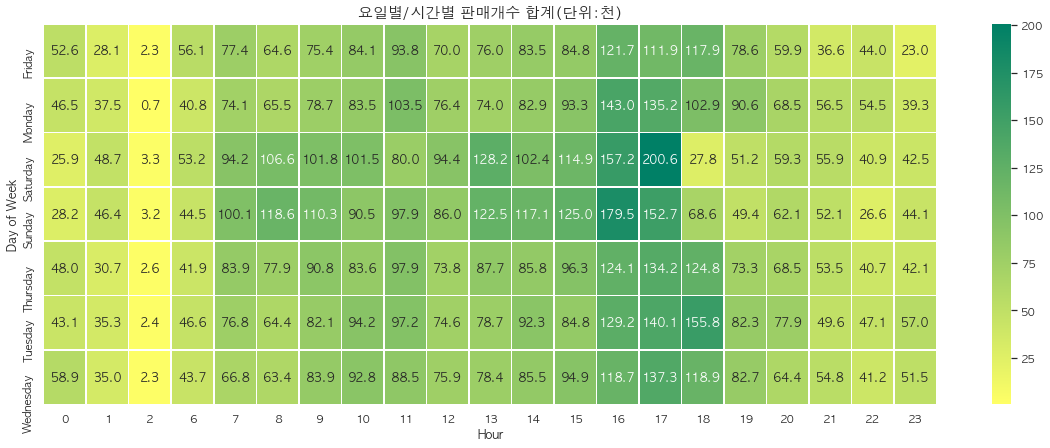

In [35]:
drawWeekHour(sales_result_ds, values = '판매개수', title = '요일별/시간별 판매개수 합계(단위:천)', aggfunc = lambda x: sum(x)/1000)

- 요일에 상관없이 2시에는 취급액, 판매개수가 매우 낮다.
- 토요일/일요일 8시~17시에 취급액이 높다. (판매개수 또한 이 시간대에 많음) 
- 요일에 상관없이 21시~22시에 취급액이 높다. 다만 판매개수는 그리 높지 않다. __이 시간대엔 판매단가가 높은 물건이 노출되는 건가?__

In [49]:
print("전체 상품 판매단가 평균: ",sales_result_ds['판매단가'].mean())
print("21시~22시 노출 상품 판매단가 평균: ",sales_result_ds.loc[(sales_result_ds['방송_시간'] == 21) | (sales_result_ds['방송_시간'] == 22)]['판매단가'].mean())
sales_result_ds.loc[(sales_result_ds['방송_시간'] == 21) | (sales_result_ds['방송_시간'] == 22)]['판매단가'].mean() / sales_result_ds['판매단가'].mean()

전체 상품 판매단가 평균:  456553.7471612415
21시~22시 노출 상품 판매단가 평균:  1156832.3340321453


2.533836029657174

- 21시~22시에 노출되는 상품의 판매단가의 평균이 전체 상품의 판매단가 평균보다 약 __2.53배__ 높다.
- 이 시간대엔 왜 비싼 물건들을 팔까?

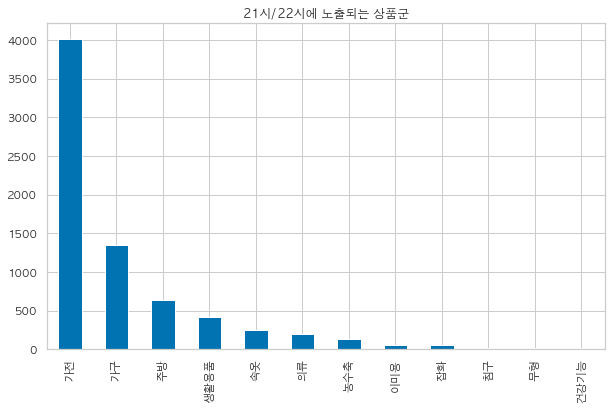

In [37]:
sales_result_ds.loc[(sales_result_ds['방송_시간'] == 21) | (sales_result_ds['방송_시간'] == 22)]['상품군'].value_counts().plot(kind = 'bar', title = '21시/22시에 노출되는 상품군', figsize = (10,6))
plt.show()

- 21시~22시에는 __'가전'__ 상품이 압도적으로 많이 노출되었고, 그 다음은 '가구' 상품이다.
- 이 상품군들은 다른 상품군에 비해 가격대가 높은 것이다.

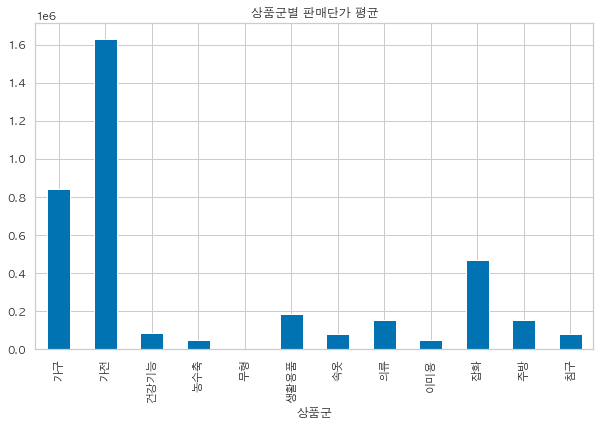

In [38]:
sales_result_ds.groupby(['상품군'])['판매단가'].mean().plot(kind = 'bar', title = '상품군별 판매단가 평균', figsize = (10,6))
plt.show()

- 역시 21시~22시에 가장 많이 노출되는 두 가지 상품군 "가전", "가구"의 판매단가가 다른 상품군들에 비해 많이 높다.
- 이 시간대에 가격이 높은 제품을 노출시키는 이유는 무엇일까?
    - __아마 가격이 높은 상품을 구매하기 위해서는 혼자가 아닌 가족 구성원들과 함께 결정을 해야하고, 이 시간대엔 대부분의 가족 구성원들이 집에 있기 때문이지 않을까.__

- 8시~17시에는 어떤 상품들이 노출될까?

<Figure size 432x288 with 0 Axes>

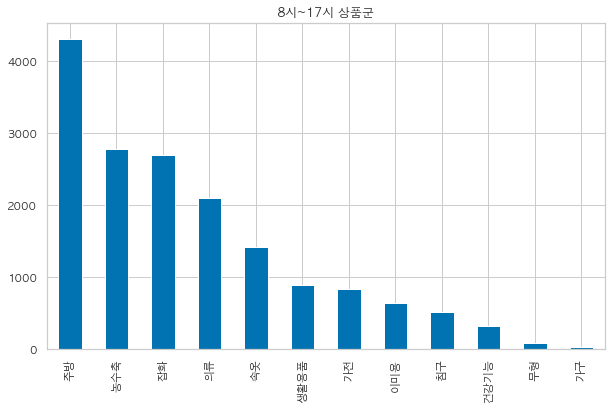

<Figure size 432x288 with 0 Axes>

In [39]:
sales_result_ds.loc[(sales_result_ds['방송_시간'] >= 8) & (sales_result_ds['방송_시간'] <= 17)]['상품군'].value_counts().plot(kind = "bar", title = '8시~17시 상품군', figsize = (10,6))
plt.figure()

- 8시~17시에는 "주방" 상품군이 가장 많이 노출되며, "농수축", "잡화", "의류" 순으로 많다.
- 21시~22시에 노출되는 "가전", "가구" 보다 판매단가가 낮은 상품들이 노출된다.
- __이 시간대에 집에 있는 주부들을 공략한 것 같다.__

- 그렇다면, 판매량이 많은 주말의 8시~17시를 살펴보자.

<Figure size 432x288 with 0 Axes>

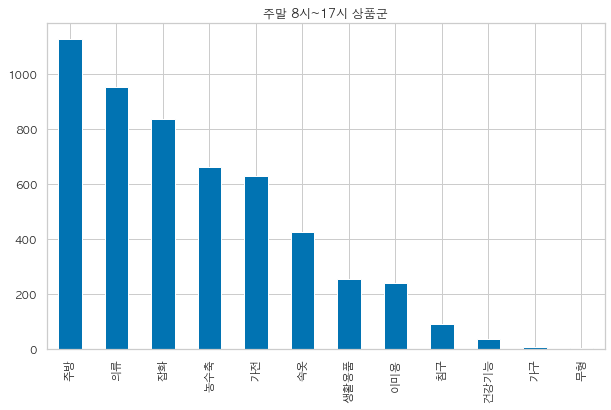

<Figure size 432x288 with 0 Axes>

In [57]:
weekend = sales_result_ds.loc[(sales_result_ds['방송_요일'] == 'Saturday') | (sales_result_ds['방송_요일'] == 'Sunday')]
weekend.loc[(sales_result_ds['방송_시간'] >= 8) & (sales_result_ds['방송_시간'] <= 17)]['상품군'].value_counts().plot(kind = "bar", title = '주말 8시~17시 상품군', figsize = (10,6))
plt.figure()

- 주말의 8시~17시에도 역시 "주방" 상품군이 가장 많이 노출되었으며, 의류, 잡화 순으로 많이 노출되었다.
- 평일과 달리 "농수축" 상품군이 상대적으로 적게 노출되었다.
- "가전" 상품군이 평일보다 상대적으로 많이 노출되었는데, 이는 주말에는 구매 결정을 할 가족 구성원이 모두 집에 있기 때문일 것이다.

- 요일별로 많이 팔리는 상품군을 살펴보자.

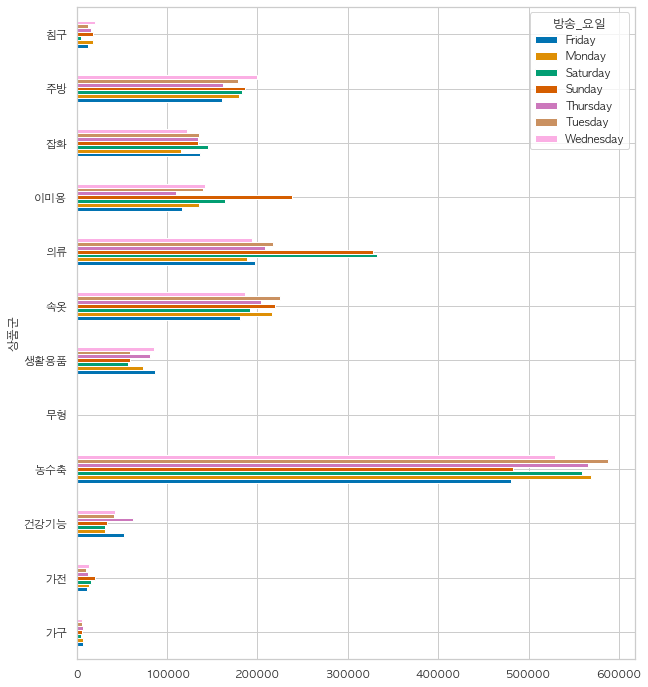

In [40]:
sales_result_ds.pivot_table(index = '상품군', columns = '방송_요일', values = '판매개수', aggfunc = sum).plot(kind = 'barh', figsize = (10,12))
plt.show()

- "농수축" 상품군:
    - 요일 무관 가장 많이 팔린다.
    - __화요일에 가장 많이 팔리며, 일요일과 금요일에 가장 적게 팔린다.__
- "의류" 상품군:
    - 주말(토요일, 일요일)이 다른 요일에 비해 판매량이 매우 많다.
- "이미용" 상품군:
    - 다른 요일에 비해 일요일에 판매량이 매우 많다.
- "침구" 상품군:
    - 토요일에 판매량이 상대적으로 적다.
- 다른 상품군은 요일별 차이가 크게 없다.

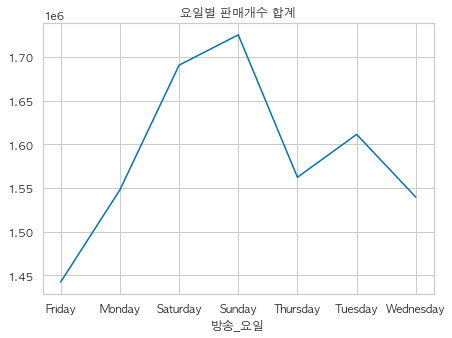

In [41]:
sales_result_ds.groupby(['방송_요일'])['판매개수'].sum().plot(title = '요일별 판매개수 합계', figsize = (7,5))
plt.show()

- __일요일, 토요일 순으로 판매량이 가장 많고, 금요일에 판매량이 가장 적다.__
- 금요일에 "농수축" 상품군의 판매량이 적은 것이 영향이 큰 것 같다.
- 일요일에도 "농수축" 상품군의 판매량이 적지만, 이를 다른 상품군들의 높은 판매량이 상쇄시키는 것 같다.

- 상품이 가장 적게 팔리는 새벽 2시에는 어떤 상품군이 노출될까?

In [42]:
sales_result_ds.loc[sales_result_ds['방송_시간'] == 2]['상품군'].value_counts()

생활용품    15
이미용     10
속옷      10
의류       9
잡화       8
건강기능     5
침구       4
농수축      4
주방       3
가구       2
무형       2
Name: 상품군, dtype: int64

- "생활용품" 상품군이 가장 많이 노출되지만, 전체적으로 노출되는 상품의 개수가 매우 적다

### 월별/일별 특징 분석

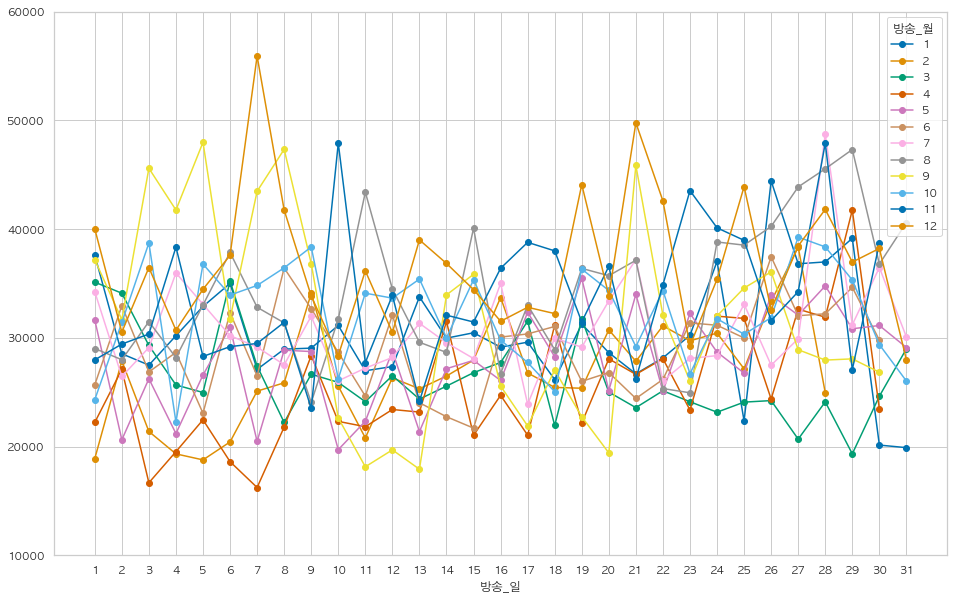

In [43]:
month_day_ds = sales_result_ds.pivot_table(index = '방송_일', columns = '방송_월', values = '판매개수', aggfunc = sum)
month_day_ds.plot(marker = 'o', figsize = (16,10))
plt.ylim([10000,60000])
plt.xticks(month_day_ds.index)
plt.show()

- 월별로 주말마다 판매량이 증가하는 것을 확인할 수 있다.
- 휴일이나 연휴 전으로도 판매량이 급증한다. (9월 추석 전)

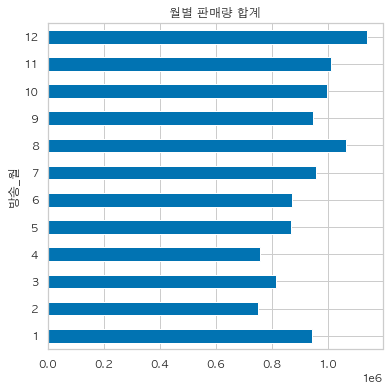

In [44]:
sales_result_ds.groupby(['방송_월'])['판매개수'].sum().plot(kind = 'barh', figsize = (6,6), title = '월별 판매량 합계')
plt.show()

- 12월에 판매량이 가장 많으며, 8월, 1월 순으로 많다.
- 2, 3, 4월에 판매량이 적다
- __2월부터 연말까지 판매량이 점점 높아지는 추세이다.__

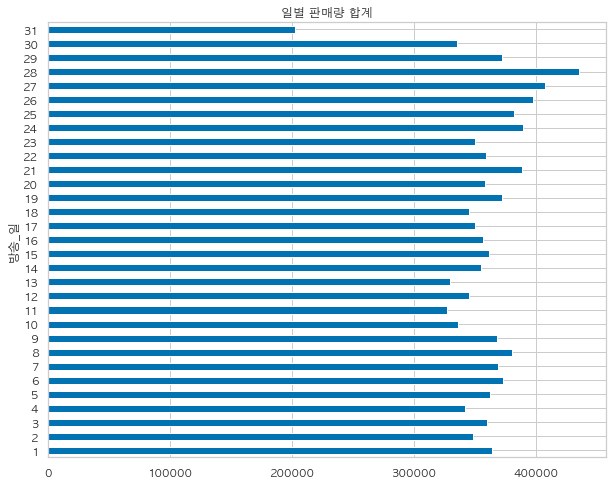

In [45]:
sales_result_ds.groupby(['방송_일'])['판매개수'].sum().plot(kind = 'barh', figsize = (10,8), title = '일별 판매량 합계')
plt.show()

- 28일에 판매량이 가장 많다.
- 31일에 판매량이 가장 적지만, 이는 31일이 없는 달의 수가 많기에 의미가 없다.
- 중순부터 말까지 점점 판매량이 증가하는 추세이다. (월급날과 관련이 있나?)

- 판매량이 아닌 취급액을 알아보자

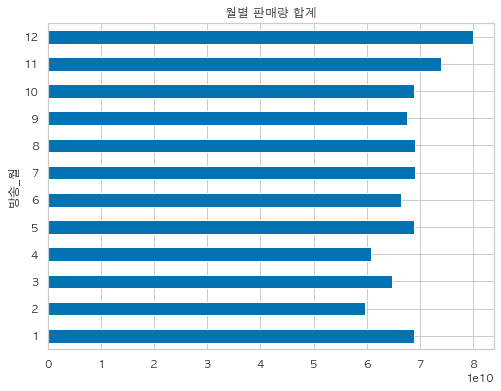

In [46]:
sales_result_ds.groupby(['방송_월'])['취급액'].sum().plot(kind = 'barh', figsize = (8,6), title = '월별 판매량 합계')
plt.show()

- 12월에 취급액이 가장 높고, 11월, 7월, 8월, 1, 5월 순으로 높다.
- 판매량과 동일하게, 2, 3, 4월의 취급액이 낮다.

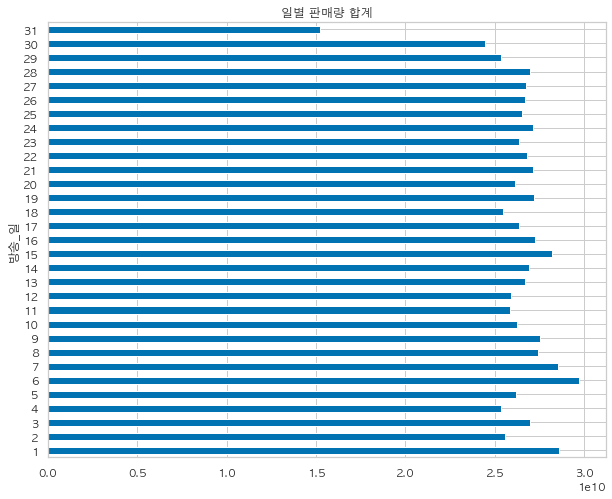

In [47]:
sales_result_ds.groupby(['방송_일'])['취급액'].sum().plot(kind = 'barh', figsize = (10,8), title = '일별 판매량 합계')
plt.show()

In [48]:
data =sales_result_ds.groupby(['방송_일'])['취급액'].sum()
data.sort_values(ascending=False).head()

방송_일
6     29712112570
1     28570705205
7     28505031850
15    28193040955
9     27548030640
Name: 취급액, dtype: int64

- 6일의 취급액이 가장 높고, 1일, 7일 순으로 높다.